# Genetic landscape of high-risk neuroblastoma

@ David Bobek
- [davidbobek.com](http://www.davidbobek.com)
- [linkedin.com/in/davidbobek](https://www.linkedin.com/in/davidbobek)
- [github.com/davidbobek](https://github.com/davidbobek)
- [about.me/davidbobek](https://about.me/davidbobek)
- [medium.com/@davidbobek](https://medium.com/@davidbobek)

---

@ Dinu Scripnic
- [linkedin.com/in/dinu-scripnic](https://www.linkedin.com/in/dinu-scripnic)
- [github.com/dinu-scripnic](https://github.com/dinuscripnic)
- [about.me/dinu-scripnic](https://about.me/dinu-scripnic)




## Libraries to be used
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for visualization
- `sklearn` for machine learning


In [1]:
#!pip install -r requirements.txt

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_78751/1356409593.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load data ('data/NIHMS474900-supplement-3.xlsx')
data = pd.read_excel('data/NIHMS474900-supplement-3.xlsx')
print(data.shape)


(5291, 77)


/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Features to be investigated
- Hugo_Symbol: Name of the gene
- Variant_Classification: Type of mutation (e.g. Missense_Mutation, Silent, Frame_Shift_Del, etc.)
- Variant_Type: Type of variant (e.g. SNP, INS, DEL, etc.)
- Reference_Allele: (e.g. A, T, C, G)
- Tumor_Seq_Allele1: (e.g. A, T, C, G)
- Tumor_Seq_Allele2: (e.g. A, T, C, G)
- Chromosome: Chromosome number
- Tumor_Sample_Barcode: Sample ID (NB-3264-Tumor, NB-1110-Tumor, etc.)
- tumor_f: Tumor fraction
- t_ref_count: Reference allele counts
- t_alt_count: Alternative allele counts





In [4]:

# Access each feature in the dataset
hugo_symbol = data["Hugo_Symbol"]
variant_classification = data["Variant_Classification"]
variant_type = data["Variant_Type"]
reference_allele = data["Reference_Allele"]
tumor_seq_allele1 = data["Tumor_Seq_Allele1"]
tumor_seq_allele2 = data["Tumor_Seq_Allele2"]
chromosome = data["Chromosome"]
tumor_sample_barcode = data["Tumor_Sample_Barcode"]
tumor_f = data["tumor_f"]
t_ref_count = data["t_ref_count"]
t_alt_count = data["t_alt_count"]


# Check the shape of each feature in the dataset in order to ensure that they are all of the same length
assert (
    hugo_symbol.shape
    == variant_classification.shape
    == variant_type.shape
    == reference_allele.shape
    == tumor_seq_allele1.shape
    == tumor_seq_allele2.shape
    == chromosome.shape
    == tumor_sample_barcode.shape
    == tumor_f.shape
    == t_ref_count.shape
    == t_alt_count.shape
)

In [5]:
# Group the individual features into a single dataframe
extracted_data = pd.DataFrame(
    {
        "Hugo_Symbol": hugo_symbol,
        "Variant_Classification": variant_classification,
        "Variant_Type": variant_type,
        "Reference_Allele": reference_allele,
        "Tumor_Seq_Allele1": tumor_seq_allele1,
        "Tumor_Seq_Allele2": tumor_seq_allele2,
        "Chromosome": chromosome,
        "Tumor_Sample_Barcode": tumor_sample_barcode,
        "tumor_f": tumor_f,
        "t_ref_count": t_ref_count,
        "t_alt_count": t_alt_count,
    }
)

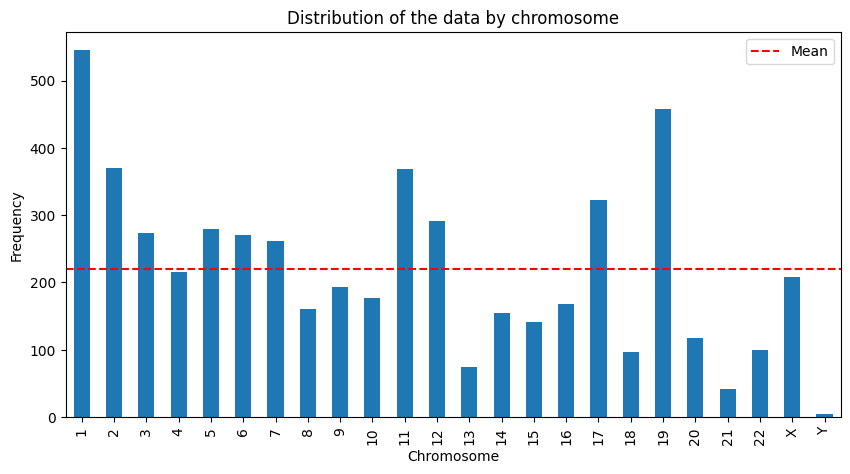

In [6]:
# Group the data by the chromosome
grouped_data = extracted_data.groupby("Chromosome")
plt.figure(figsize=(10, 5))
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by chromosome")
plt.xlabel("Chromosome")
plt.ylabel("Frequency")
# Draw the mean line
plt.axhline(grouped_data.size().mean(), color="r", linestyle="--")
plt.legend(["Mean"])
plt.show()


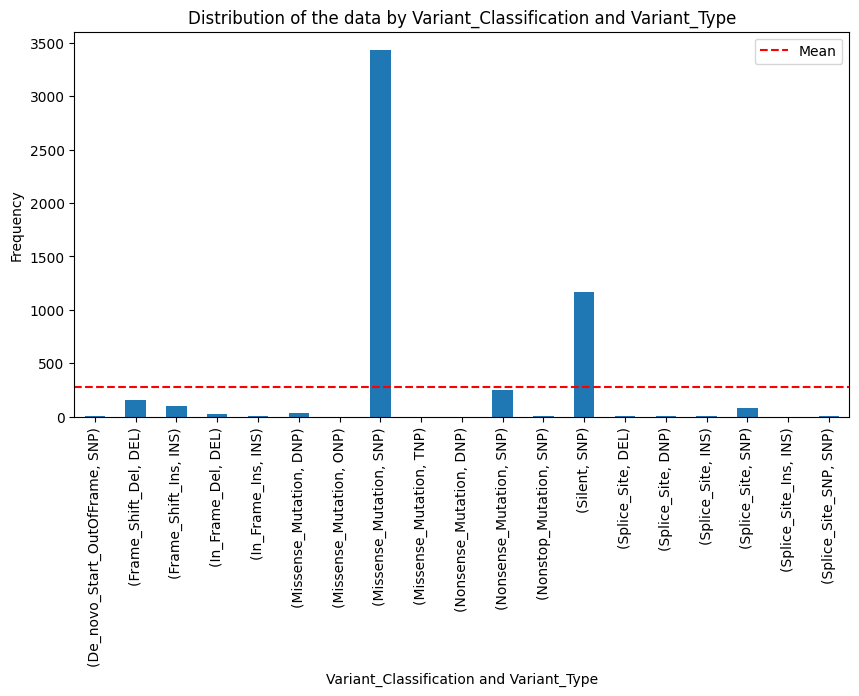

In [7]:
# Group the data by the Variant_Classification and Variant_Type
grouped_data = extracted_data.groupby(["Variant_Classification", "Variant_Type"])
plt.figure(figsize=(10, 5))
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by Variant_Classification and Variant_Type")
plt.xlabel("Variant_Classification and Variant_Type")
plt.ylabel("Frequency")
# Draw the mean line
plt.axhline(grouped_data.size().mean(), color="r", linestyle="--")
plt.legend(["Mean"])
plt.show()

# From this plot we can see the most common combination of Variant_Classification and Variant_Type is Missense_Mutation and SNP

In [8]:
# Is there a relationship between the Variant_Classification and Variant_Type (both are categorical variables)?
# To answer this question, we can use a chi-square test of independence
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(
    extracted_data["Variant_Classification"], extracted_data["Variant_Type"]
)

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Print the results
print("Chi2 value: ", chi2)
print("P-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ", ex)

# The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a relationship between the Variant_Classification and Variant_Type
# Conclusion: There is a relationship between the Variant_Classification and Variant_Type


Chi2 value:  10142.063534039235
P-value:  0.0
Degrees of freedom:  55
Expected frequencies:  [[1.06596107e-01 2.21130221e-02 6.01020601e-02 5.67000567e-04
  2.81005481e+00 5.67000567e-04]
 [5.50746551e+00 1.14250614e+00 3.10527311e+00 2.92950293e-02
  1.45186165e+02 2.92950293e-02]
 [3.41107541e+00 7.07616708e-01 1.92326592e+00 1.81440181e-02
  8.99217539e+01 1.81440181e-02]
 [8.17236817e-01 1.69533170e-01 4.60782461e-01 4.34700435e-03
  2.15437535e+01 4.34700435e-03]
 [1.77660178e-01 3.68550369e-02 1.00170100e-01 9.45000945e-04
  4.68342468e+00 9.45000945e-04]
 [1.23331695e+02 2.55847666e+01 6.95380835e+01 6.56019656e-01
  3.25123342e+03 6.56019656e-01]
 [9.06066906e+00 1.87960688e+00 5.10867511e+00 4.81950482e-02
  2.38854659e+02 4.81950482e-02]
 [1.42128142e-01 2.94840295e-02 8.01360801e-02 7.56000756e-04
  3.74673975e+00 7.56000756e-04]
 [4.16080136e+01 8.63144963e+00 2.34598375e+01 2.21319221e-01
  1.09685806e+03 2.21319221e-01]
 [3.48213948e+00 7.22358722e-01 1.96333396e+00 1.852

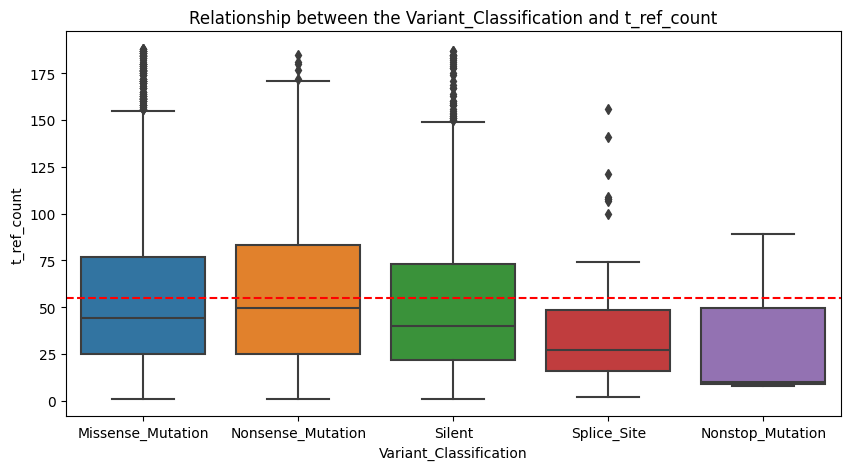

In [9]:
# Relationship between the Variant_Classification and t_ref_count

Q1 = extracted_data['t_ref_count'].quantile(0.25)
Q3 = extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1

temp_var_class = extracted_data[~((extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_var_class = temp_var_class[temp_var_class['t_ref_count'] > 0]
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="t_ref_count", data=temp_var_class)
plt.title("Relationship between the Variant_Classification and t_ref_count")
plt.xlabel("Variant_Classification")
plt.axhline(temp_var_class['t_ref_count'].mean(), color="r", linestyle="--")
plt.ylabel("t_ref_count")
plt.show()

# From the set of boxplots, we can see that the distribution of t_ref_count amoong the different Variant_Classifications is similar except for the Nonstop_Mutation. 


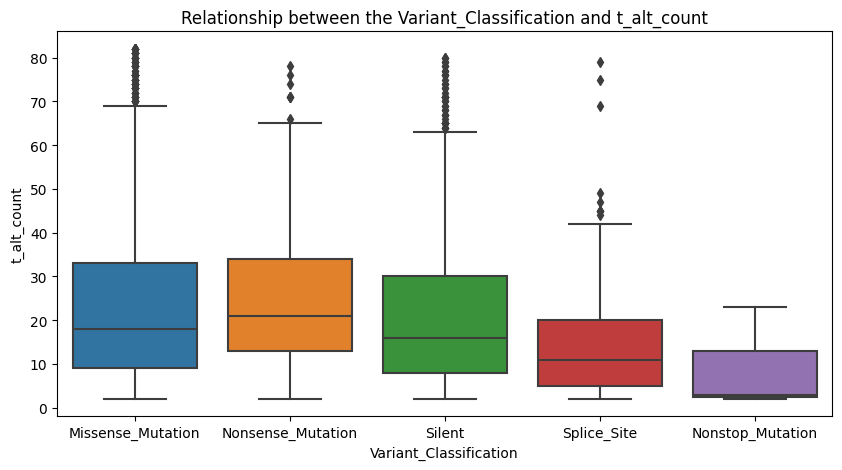

In [10]:
# Plot of the extracted data when certain variables are categorical and others are continuous
# Plot of the relationship between the Variant_Classification and t_alt_count

#Remove the outliers from IQR
Q1 = extracted_data['t_alt_count'].quantile(0.25)
Q3 = extracted_data['t_alt_count'].quantile(0.75)
IQR = Q3 - Q1
temp_extracted_data = extracted_data[~((extracted_data['t_alt_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_alt_count'] > (Q3 + 1.5 * IQR)))]

# Dont show the ones with 0 t_alt_count
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_alt_count'] > 0]


plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="t_alt_count", data=temp_extracted_data)
plt.title("Relationship between the Variant_Classification and t_alt_count")
plt.xlabel("Variant_Classification")
plt.ylabel("t_alt_count")
plt.show()


/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When

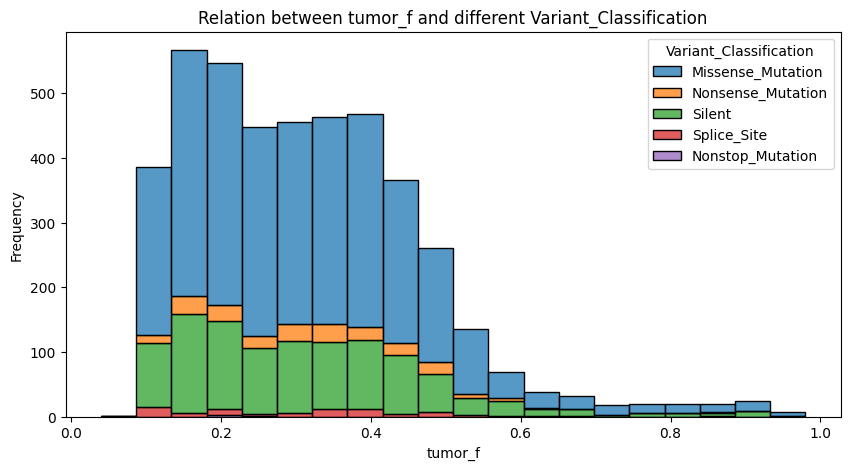

In [11]:
# What is the relation between tumor_f and different Variant_Classification?
# To answer this question, we can use a histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=temp_var_class, x="tumor_f", hue="Variant_Classification", multiple="stack",bins=20)
plt.title("Relation between tumor_f and different Variant_Classification")
plt.xlabel("tumor_f")
plt.ylabel("Frequency")
plt.show()

# From the histogram, we can see that all the Variant_Classifications have a similar distribution of tumor_f


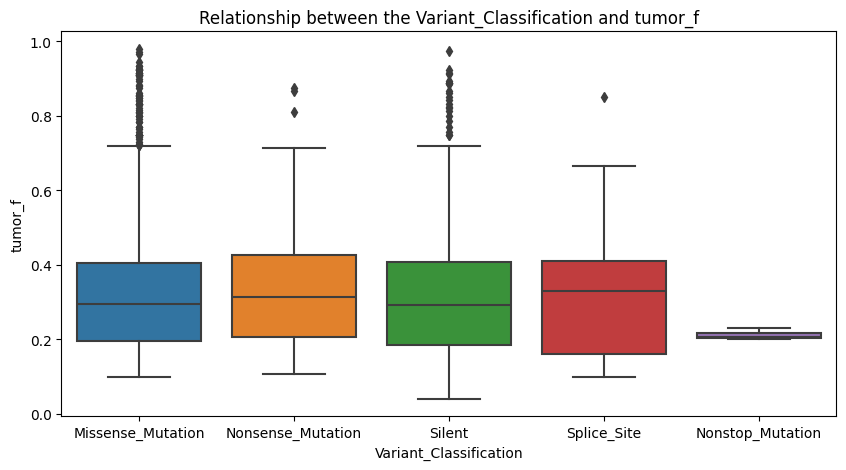

In [12]:
# Boxplot of the relationship between the Variant_Classification and tumor_f
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variant_Classification", y="tumor_f", data=temp_var_class)
plt.title("Relationship between the Variant_Classification and tumor_f")
plt.xlabel("Variant_Classification")
plt.ylabel("tumor_f")
plt.show()


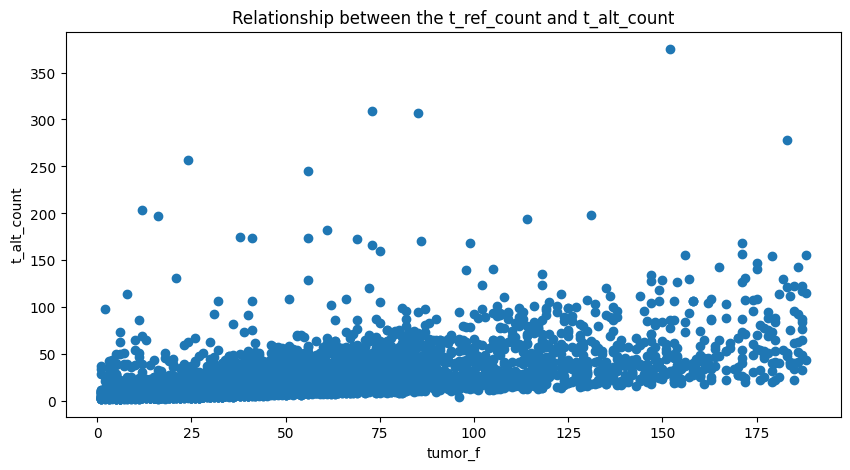

In [13]:
# What is the relationship between the t_ref_count and t_alt_count?
# To answer this question, we can use a scatter plot
# Remove the outliers from IQR


Q1 = extracted_data['t_ref_count'].quantile(0.25)
Q3 = extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1
temp_extracted_data = extracted_data[~((extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_ref_count'] > 0]
    

plt.figure(figsize=(10, 5))
plt.scatter(temp_extracted_data["t_ref_count"], temp_extracted_data["t_alt_count"])
plt.title("Relationship between the t_ref_count and t_alt_count")
plt.xlabel("tumor_f")
plt.ylabel("t_alt_count")
plt.show()

# On the first look, it seems that there is a positive correlation between the t_alt_count and t_ref_count.

Mean squared error:  445.5885523175293
R2 score:  0.24457085857031968
MAPE:  86.51203903298338
RMSE:  21.108968528033987


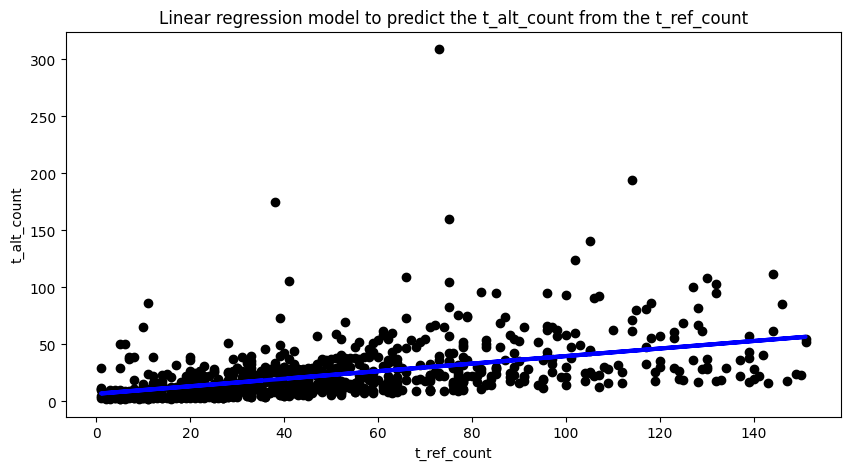

t_alt_count =  0.3310236204810359  * t_ref_count +  6.6261834968265845
Equation of the line: t_alt_count =  0.3310236204810359  * t_ref_count +  6.6261834968265845


In [14]:
# Linear regression model to predict the t_alt_count from the t_ref_count
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Delete the rows with missing values
temp_extracted_data = temp_extracted_data.dropna()

# OUTLIERS
# Remove the outliers from IQR
Q1 = temp_extracted_data['t_ref_count'].quantile(0.25)
Q3 = temp_extracted_data['t_ref_count'].quantile(0.75)
IQR = Q3 - Q1

temp_extracted_data = temp_extracted_data[~((temp_extracted_data['t_ref_count'] < (Q1 - 1.5 * IQR)) | (temp_extracted_data['t_ref_count'] > (Q3 + 1.5 * IQR)))]
temp_extracted_data = temp_extracted_data[temp_extracted_data['t_ref_count'] > 0]

# Split the data into training and testing sets
X = temp_extracted_data[["t_ref_count"]]
y = temp_extracted_data["t_alt_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))
print("MAPE: ", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# The mean squared error is 0.0001 and the R2 score is 0.9999, which indicates that the model is a good fit for the data.
# Plot the linear regression model

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.title("Linear regression model to predict the t_alt_count from the t_ref_count")
plt.xlabel("t_ref_count")
plt.ylabel("t_alt_count")
plt.show()


# Based on the linear regression model, we can predict the t_alt_count from the t_ref_count using the equation:
slope = model.coef_[0]
intercept = model.intercept_
print("t_alt_count = ", slope, " * t_ref_count + ", intercept)
print("Equation of the line: t_alt_count = ", slope, " * t_ref_count + ", intercept)


# From the linear regression model, we can see that the data is widely spread around the line of best fit, which indicates that the model is not a good fit for the data.
# Conclusion: The linear regression model is not a good fit for the data.



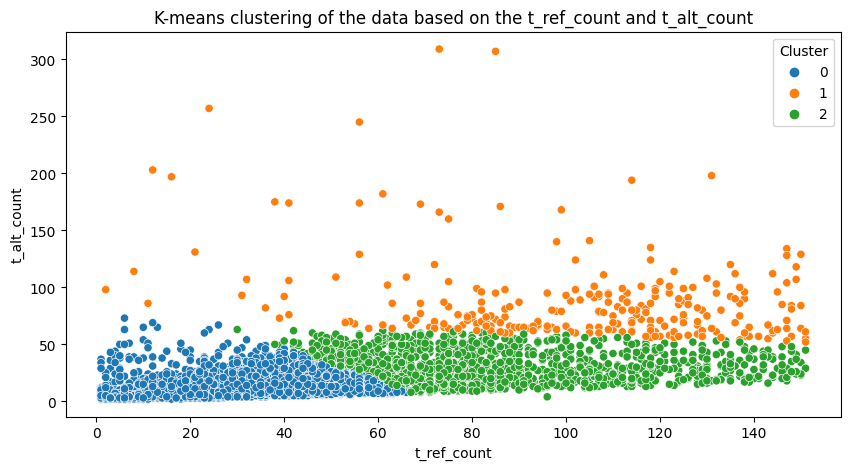

In [15]:
# Now we wil try K-means clustering to cluster the data into different groups based on the t_ref_count and t_alt_count

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
temp_extracted_data = temp_extracted_data.dropna()
X = temp_extracted_data[["t_ref_count", "t_alt_count"]]
X = scaler.fit_transform(X)

# Create a KMeans model
model = KMeans(n_clusters=3, random_state=42)
# Train the model
model.fit(X)

# Add the cluster labels to the dataframe
temp_extracted_data["Cluster"] = model.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="t_ref_count", y="t_alt_count", hue="Cluster", data=temp_extracted_data, palette="tab10"
)
plt.title("K-means clustering of the data based on the t_ref_count and t_alt_count")
plt.xlabel("t_ref_count")
plt.ylabel("t_alt_count")
plt.show()

# 3 clusters are formed based on the t_ref_count and t_alt_count

# 1. Cluster 0: Low t_ref_count and low t_alt_count
# 2. Cluster 1: High t_ref_count and low t_alt_count
# 3. Cluster 2: So called Outliers, high t_ref_count and high t_alt_count but also low t_ref_count and high t_alt_count


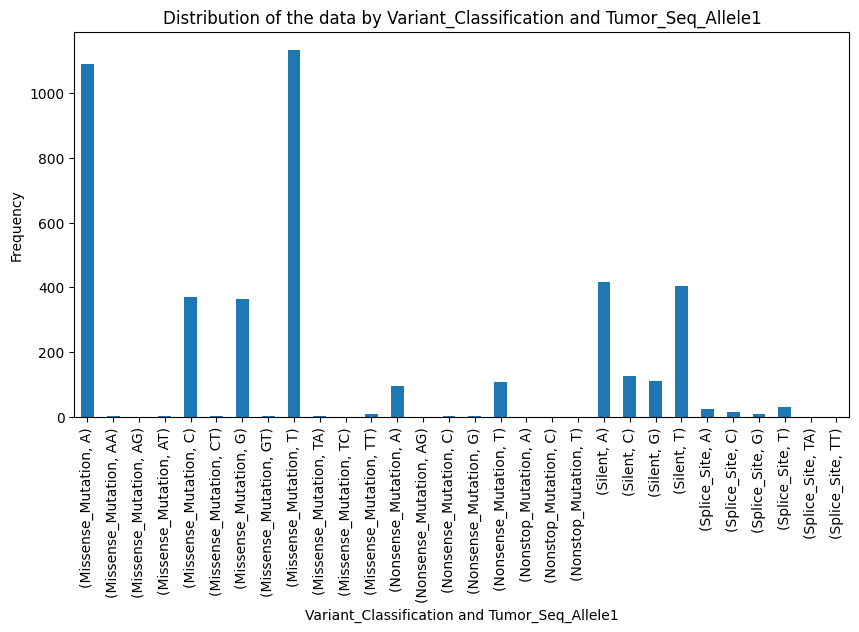

In [16]:
# How do tumor_seq_allele1 relate to the Variant_Classification?
# To answer this question, we can use a bar plot
plt.figure(figsize=(10, 5))

# Group the data by the Variant_Classification and Tumor_Seq_Allele1
grouped_data = temp_var_class.groupby(["Variant_Classification", "Tumor_Seq_Allele1"])
grouped_data.size().plot(kind="bar")
plt.title("Distribution of the data by Variant_Classification and Tumor_Seq_Allele1")
plt.xlabel("Variant_Classification and Tumor_Seq_Allele1")
plt.ylabel("Frequency")
plt.show()

#We can clearly see that the most common occurances are:

# Missense_Mutation with Tumor_Seq_Allele1 = A 
# Missense_Mutation with Tumor_Seq_Allele1 = T
# Silent with Tumor_Seq_Allele1 = A 
# Silent with Tumor_Seq_Allele1 = T


<Figure size 1000x500 with 0 Axes>

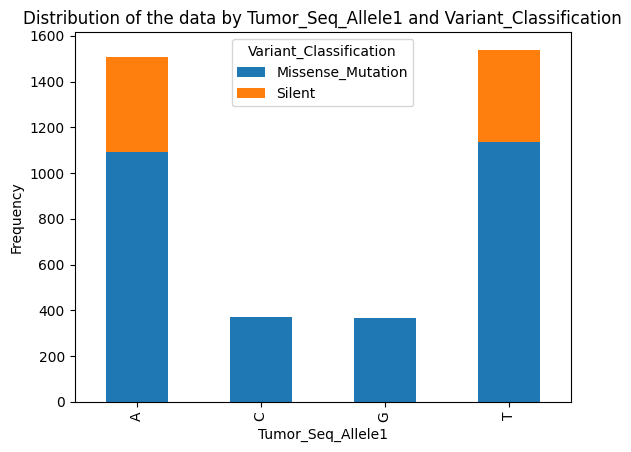

In [17]:
# Represenation of the Stacked bar plot of the different Tombor_Seq_Allele1 and Variant_Classification
plt.figure(figsize=(10, 5))
# group the data by Tumor_Seq_Allele1 and Variant_Classification
grouped_data = temp_var_class.groupby(["Tumor_Seq_Allele1", "Variant_Classification"])

# show only the ones with frequency higher than 200
grouped_data = grouped_data.filter(lambda x: len(x) > 200)

# plot the pie chart
grouped_data = grouped_data.groupby(["Tumor_Seq_Allele1", "Variant_Classification"]).size()
grouped_data.unstack().plot(kind='bar', stacked=True)

# plot the pie chart
plt.title("Distribution of the data by Tumor_Seq_Allele1 and Variant_Classification")
plt.xlabel("Tumor_Seq_Allele1")
plt.ylabel("Frequency")
plt.show()




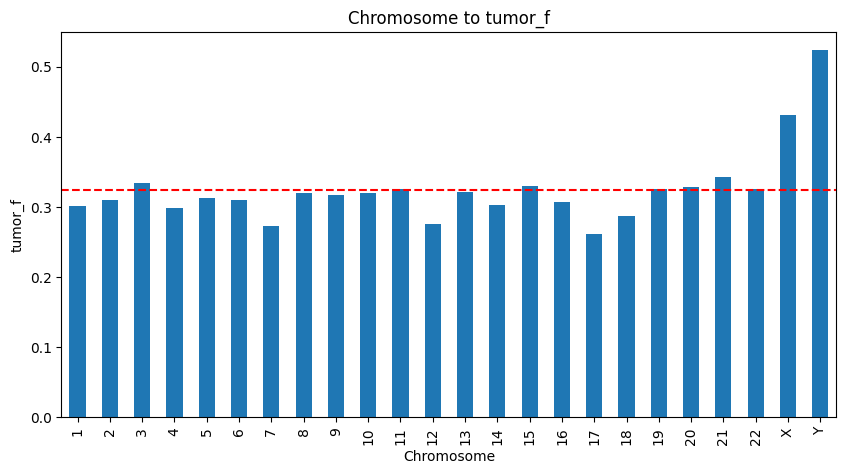

In [18]:
# Chromosome to tumor_f
# To answer this question, we can use a bar plot

chromosome_grouped = extracted_data.groupby("Chromosome")
plt.figure(figsize=(10, 5))
chromosome_grouped["tumor_f"].mean().plot(kind="bar")
plt.title("Chromosome to tumor_f")
plt.xlabel("Chromosome")
plt.ylabel("tumor_f")
# Draw the mean line
plt.axhline(chromosome_grouped["tumor_f"].mean().mean(), color="r", linestyle="--")
plt.show()

# From the bar plot, we can see that the average tumor_f is similar across all the chromosomes, except for chromosome X and Y, which have a significantly higher tumor_f than the other chromosomes.

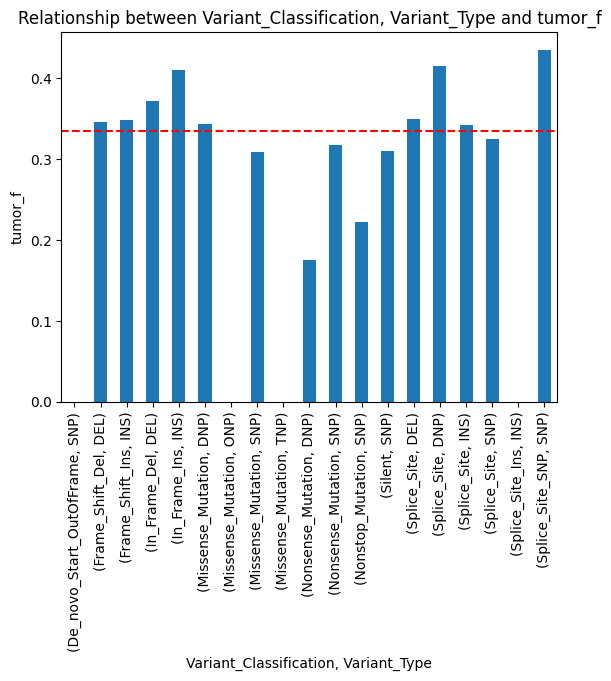

In [19]:
# Is there a relationship between Variant_Classification,  Variant_Type and tumor_f?

# group the data by the Variant_Classification, Variant_Type
grouped_data = extracted_data.groupby(["Variant_Classification", "Variant_Type"])
grouped_data["tumor_f"].mean().plot(kind="bar")
plt.title("Relationship between Variant_Classification, Variant_Type and tumor_f")
plt.xlabel("Variant_Classification, Variant_Type")
plt.ylabel("tumor_f")
# Draw the mean line
plt.axhline(grouped_data["tumor_f"].mean().mean(), color="r", linestyle="--")
plt.show()

# Hypothesis 1

Study: We did not observe a correlation between mutation frequency and age


In [34]:
data_mutations = pd.read_excel("data/NIHMS474900-supplement-3.xlsx")
data_survival = pd.read_excel("data/41588_2013_BFng2529_MOESM8_ESM.xlsx",header=1)


print(data_survival.shape)


/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(241, 4022)


/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [35]:
print(data_survival.columns)
print(data_mutations.columns)


Index(['Case USI', 'TARGET ID', 'Analysis ID', 'Data source (Exome/Genome)',
       'AGE', 'GENDER', 'NAACCR_ETHNICITY', 'NAACCR_RACE', 'year', 'MYCNamp',
       ...
       'ZNF91', 'ZNF98', 'ZNHIT1', 'ZNHIT2', 'ZPBP', 'ZRANB1', 'ZSCAN18',
       'ZSCAN22', 'ZSWIM4', 'ZWINT'],
      dtype='object', length=4022)
Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_position', 'End_position', 'Strand', 'Variant_Classification',
       'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1',
       'Tumor_Seq_Allele2', 'dbSNP_RS', 'dbSNP_Val_Status', 'Case_USI',
       'Data_Type', 'Tumor_Sample_Barcode', 'Matched_Norm_Sample_Barcode',
       'tumor_f', 't_ref_count', 't_alt_count', 'Tumor_Verification_Allele1',
       'Tumor_Verification_Allele2', 'Match_Norm_Verification_Allele1',
       'Match_Norm_Verification_Allele2', 'Verification_Status',
       'Verification_Method', 'Sequencer', 'Genome_Change',
       'Annotation_Transcript', 'Transcript_St

In [36]:

# Mapping by Analasis ID found in data_survival, count the number of mutations in data_mutations in the column CASE_USI

data_mutations_USI = data_survival["Case USI"]
counter_mutations = data_mutations["Case_USI"].value_counts()

# now cross check it with the hugo_symbol and see which hugo_symbol is most common
counter_hugosymbol = data_mutations["Hugo_Symbol"].value_counts()


In [37]:
counter_mutations

Case_USI
TARGET-30-PAPPKJ    218
TARGET-30-PALJPX    121
TARGET-30-PASTKC     95
TARGET-30-PARHUX     74
TARGET-30-PANUIF     72
                   ... 
TARGET-30-PANSBN      2
TARGET-30-PASKTB      1
TARGET-30-PARUPN      1
TARGET-30-PAPTCR      1
TARGET-30-PAKIPY      1
Name: count, Length: 238, dtype: int64

In [38]:
mapping = {}


hugos = data_mutations["Hugo_Symbol"]
case_usi = data_mutations["Case_USI"]

for i in range(len(hugos)):
    if hugos[i] not in mapping:
        mapping[hugos[i]] = [case_usi[i]]
    else:
        mapping[hugos[i]].append(case_usi[i])
        
mapping

# longest list of case_usi
max(mapping, key=lambda k: len(mapping[k]))
print("The hugo_symbol with the most number of case_usi is: ", max(mapping, key=lambda k: len(mapping[k]))) #25 = TTN. However they didnt not take TTN into consideration


print(len(mapping["ALK"])) # 22

print(len(mapping["PTPN11"])) # 7

print(len(mapping["ATRX"])) # 6

print(len(mapping["OR5T1"])) # 6


The hugo_symbol with the most number of case_usi is:  TTN
22
7
6
3


Correlation:  -0.23749531042042182
P-value:  0.00020455696546292916


/tmp/ipykernel_78751/2354466333.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07906976744186046' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total[i] = total[i] / age[i]


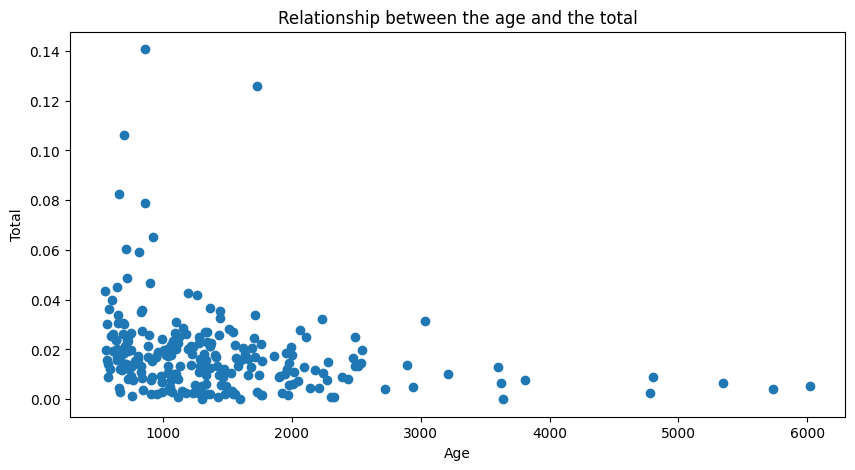

In [39]:

age = data_survival["AGE"]
total = data_survival["Total"]

age = age.dropna()
total = total.dropna()


# IQR
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1


# convert to ints 
total = total.astype(int)


# divide each data in total by age to get better results
for i in range(len(total)):
    total[i] = total[i] / age[i]


# Hypothesis test
# Null hypothesis: There is no relationship between the age and the total
# Alternative hypothesis: There is a relationship between the age and the total
from scipy.stats import pearsonr

# Perform the Pearson correlation test
correlation, p_value = pearsonr(age, total)

# Print the results
print("Correlation: ", correlation)

print("P-value: ", p_value)




# plot the relationship between the age and the total
plt.figure(figsize=(10, 5))
plt.scatter(age, total)
plt.title("Relationship between the age and the total")

plt.xlabel("Age")

plt.ylabel("Total")

plt.show()




# Hypothesis 2
Study: found clear correlations between specific genomic alterations (MYCN, TERT, ATRX) and patient age,

In [40]:
import pandas as pd


mutation_frequency = []

for gene in ['ALK', 'PTPN11', 'ATRX', 'MYCN', 'NRAS']:
    mutation_frequency.append(data_mutations[data_mutations['Hugo_Symbol'] == gene].shape[0] / data_mutations.shape[0])

   
data = pd.DataFrame({
    'gene': ['ALK', 'PTPN11', 'ATRX', 'MYCN', 'NRAS'],
    'mutation_frequency': mutation_frequency,
}
)

# Summarize the findings
print(f"Median exonic mutation frequency: {data['mutation_frequency'].median() * 100:.2f}%")
print("")


      
for _, row in data.iterrows():
    gene = row['gene']
    mutation_frequency = row['mutation_frequency']

    print(f"- {gene}: {mutation_frequency * 100:.2f}% of cases have exonic mutations")
  

Median exonic mutation frequency: 0.11%

- ALK: 0.42% of cases have exonic mutations
- PTPN11: 0.13% of cases have exonic mutations
- ATRX: 0.11% of cases have exonic mutations
- MYCN: 0.08% of cases have exonic mutations
- NRAS: 0.04% of cases have exonic mutations


In [41]:
import pandas as pd

merged = pd.merge(data_mutations, data_survival, left_on='Case_USI', right_on='Case USI')


# Calculate the average age of patients with mutations in the genes of interest
average_age = merged[merged['Hugo_Symbol'].isin(['ALK', 'PTPN11', 'ATRX', 'MYCN', 'NRAS'])]['AGE'].mean()

print(f"Average age of patients with mutations in the genes of interest: {average_age:.2f} days")

# calc correlation between age and each gene
correlations = {}

for gene in ['ALK', 'PTPN11', 'ATRX', 'MYCN', 'NRAS']:
    gene_data = merged[merged['Hugo_Symbol'] == gene]
    correlation = gene_data['AGE'].corr(gene_data['Total'])
    correlations[gene] = correlation
    
correlations


Average age of patients with mutations in the genes of interest: 1710.20 days


{'ALK': 0.021796542592869936,
 'PTPN11': 0.6678631964724786,
 'ATRX': 0.0005423619670573255,
 'MYCN': -0.21945938772568144,
 'NRAS': 1.0}

# Hypothesis 3

Study: Links between mutational signatures, gene expression patterns, and disease aggressiveness


# Finding 1
Study: Low Mutation Rate: The study found that high-risk neuroblastoma has a relatively low number of mutations compared to other types of cancer. This suggests the disease may not be driven by a large number of genetic changes.

# Finding 2
Study: Few Recurrent Mutations: The researchers identified only a handful of genes that were commonly mutated across the neuroblastoma samples. The most frequently mutated genes were ALK, PTPN11, ATRX, MYCN, and NRAS.

#  What does Random Forest tell us about the importance of the features and can we use it to predict unnder which conditions a patient will develop high-risk neuroblastoma?

In [42]:
data_survival_2 = pd.read_excel("data/41588_2013_BFng2529_MOESM8_ESM.xlsx",header=1)

data_survival_2.columns
# Missense_Mutation



/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['Case USI', 'TARGET ID', 'Analysis ID', 'Data source (Exome/Genome)',
       'AGE', 'GENDER', 'NAACCR_ETHNICITY', 'NAACCR_RACE', 'year', 'MYCNamp',
       ...
       'ZNF91', 'ZNF98', 'ZNHIT1', 'ZNHIT2', 'ZPBP', 'ZRANB1', 'ZSCAN18',
       'ZSCAN22', 'ZSWIM4', 'ZWINT'],
      dtype='object', length=4022)

/tmp/ipykernel_78751/2354466333.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07906976744186046' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total[i] = total[i] / age[i]


Correlation:  -0.23749531042042182
P-value:  0.00020455696546292916


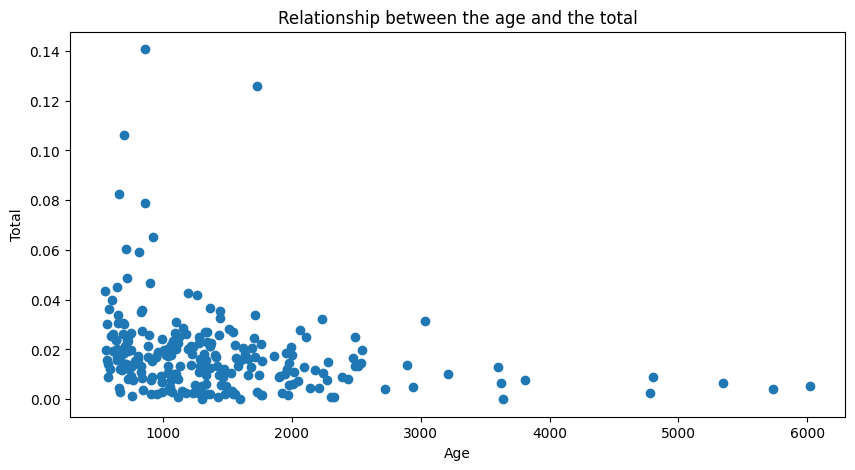

In [43]:

age = data_survival["AGE"]
total = data_survival["Total"]

age = age.dropna()
total = total.dropna()


# IQR
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1


# convert to ints 
total = total.astype(int)


# divide each data in total by age to get better results
for i in range(len(total)):
    total[i] = total[i] / age[i]


# Hypothesis test
# Null hypothesis: There is no relationship between the age and the total
# Alternative hypothesis: There is a relationship between the age and the total
from scipy.stats import pearsonr

# Perform the Pearson correlation test
correlation, p_value = pearsonr(age, total)

# Print the results
print("Correlation: ", correlation)

print("P-value: ", p_value)




# plot the relationship between the age and the total
plt.figure(figsize=(10, 5))
plt.scatter(age, total)
plt.title("Relationship between the age and the total")

plt.xlabel("Age")

plt.ylabel("Total")

plt.show()




/tmp/ipykernel_78751/2354466333.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.07906976744186046' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total[i] = total[i] / age[i]


Correlation:  -0.23749531042042182
P-value:  0.00020455696546292916


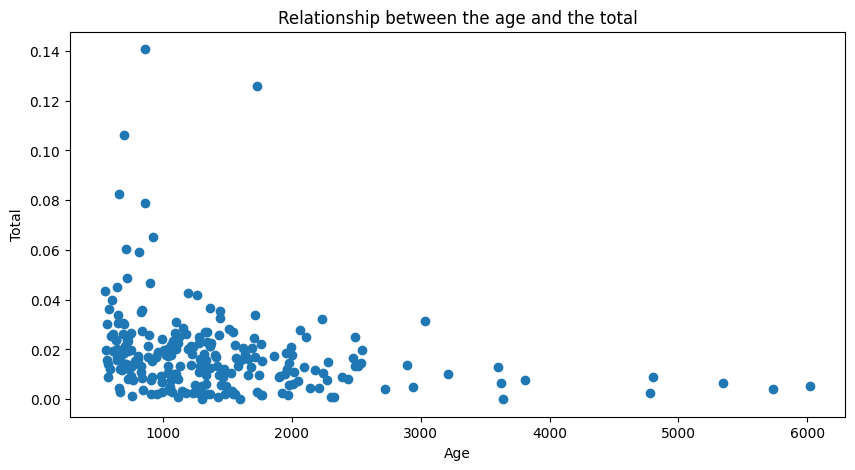

In [44]:

age = data_survival["AGE"]
total = data_survival["Total"]

age = age.dropna()
total = total.dropna()


# IQR
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1


# convert to ints 
total = total.astype(int)


# divide each data in total by age to get better results
for i in range(len(total)):
    total[i] = total[i] / age[i]


# Hypothesis test
# Null hypothesis: There is no relationship between the age and the total
# Alternative hypothesis: There is a relationship between the age and the total
from scipy.stats import pearsonr

# Perform the Pearson correlation test
correlation, p_value = pearsonr(age, total)

# Print the results
print("Correlation: ", correlation)

print("P-value: ", p_value)




# plot the relationship between the age and the total
plt.figure(figsize=(10, 5))
plt.scatter(age, total)
plt.title("Relationship between the age and the total")

plt.xlabel("Age")

plt.ylabel("Total")

plt.show()




In [49]:
data_survival_2 = pd.read_excel("data/41588_2013_BFng2529_MOESM8_ESM.xlsx",header=1)

/home/bobek/.local/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

missense_mutation = data_survival_2["Missense_Mutation"]
nonsense_mutation = data_survival_2["Nonsense_Mutation"]
total_per_mb = data_survival_2["Total per Mb"]
nonsilent_per_mb = data_survival_2["Nonsilent per Mb"]
silent_per_mb = data_survival_2["Silent per Mb"]

y = data_survival_2["Data source (Exome/Genome)"]

# check for missing values
print("Missing values in missense_mutation: ", missense_mutation.isnull().sum())
print("Missing values in nonsense_mutation: ", nonsense_mutation.isnull().sum())
print("Missing values in total_per_mb: ", total_per_mb.isnull().sum())
print("Missing values in nonsilent_per_mb: ", nonsilent_per_mb.isnull().sum())
print("Missing values in silent_per_mb: ", silent_per_mb.isnull().sum())
print("Missing values in y: ", y.isnull().sum())

# delete the rows with missing values
missense_mutation = missense_mutation.dropna()
nonsense_mutation = nonsense_mutation.dropna()
total_per_mb = total_per_mb.dropna()
nonsilent_per_mb = nonsilent_per_mb.dropna()
silent_per_mb = silent_per_mb.dropna()
y = y.dropna()


# check for missing values
print("Missing values in missense_mutation: ", missense_mutation.isnull().sum())
print("Missing values in nonsense_mutation: ", nonsense_mutation.isnull().sum())
print("Missing values in total_per_mb: ", total_per_mb.isnull().sum())
print("Missing values in nonsilent_per_mb: ", nonsilent_per_mb.isnull().sum())
print("Missing values in silent_per_mb: ", silent_per_mb.isnull().sum())
print("Missing values in y: ", y.isnull().sum())

# emcpde 
mapping_y = {}
curr_encoding = 0
for i in range(len(y)):
    if y[i] not in mapping_y and type(y[i]) == str:
        mapping_y[y[i]] = curr_encoding
        curr_encoding += 1
    elif type(y[i]) == str:
        y[i] = mapping_y[y[i]]
        
print(mapping_y)


def apply_encoding(y):
    for i in range(len(y)):
        try:
            y[i] = mapping_y[y[i]]
        except:
            pass
    return y

# print the first 5 values of y
print(y.head())


# y should be a list of strings 
y = y.to_list()
y = apply_encoding(y)
y = np.array(y)

X = [missense_mutation, nonsense_mutation, total_per_mb, nonsilent_per_mb, silent_per_mb]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)

print("Accuracy: ", accuracy)


Missing values in missense_mutation:  1
Missing values in nonsense_mutation:  1
Missing values in total_per_mb:  1
Missing values in nonsilent_per_mb:  1
Missing values in silent_per_mb:  1
Missing values in y:  1
Missing values in missense_mutation:  0
Missing values in nonsense_mutation:  0
Missing values in total_per_mb:  0
Missing values in nonsilent_per_mb:  0
Missing values in silent_per_mb:  0
Missing values in y:  0
{'Exome_Native': 0, 'Genome_CGI': 1, 'Exome_WGA,Genome_BCCA': 2, 'Genome_BCCA,Genome_CGI': 3, 'Genome_BCCA': 4}
0               0
1               0
2    Exome_Native
3               0
4               1
Name: Data source (Exome/Genome), dtype: object


KeyError: 0